In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
# Load CSV file into Dataframe
sleep_data_df = pd.read_csv('Resources/Sleep_health_and_lifestyle_dataset.csv')

sleep_data_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
# Sort only needed Data and Group it
needed_data_df = sleep_data_df[['Sleep Duration', 'Quality of Sleep', 'Sleep Disorder', 'Gender']].copy()

duration_grouped = needed_data_df.groupby('Sleep Disorder')['Sleep Duration'].mean()
quality_grouped = needed_data_df.groupby('Sleep Disorder')['Quality of Sleep'].mean()
grouped_data_df = pd.DataFrame({
    'Sleep Duration': duration_grouped,
    'Quality of Sleep': quality_grouped
})
grouped_data_df

,Sleep Duration,Quality of Sleep
Sleep Disorder,,
Insomnia,6.589610,6.532468
None,7.358447,7.625571
Sleep Apnea,7.032051,7.205128


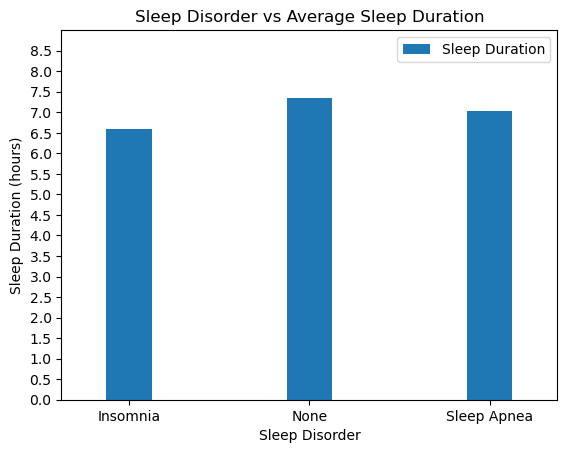

In [18]:
# Graph Duration Data - Combined
grouped_data_df.plot(y= 'Sleep Duration', kind='bar', width=.25)
plt.title('Sleep Disorder vs Average Sleep Duration')
plt.ylabel('Sleep Duration (hours)')
plt.ylim(0,9)
plt.yticks(np.arange(0, 9, .5))
plt.xticks(rotation=0)
plt.show()

Sleep Disorder  Gender
Insomnia        Female    6.633333
                Male      6.551220
None            Female    7.650000
                Male      7.183942
Sleep Apnea     Female    7.035821
                Male      7.009091
Name: Sleep Duration, dtype: float64


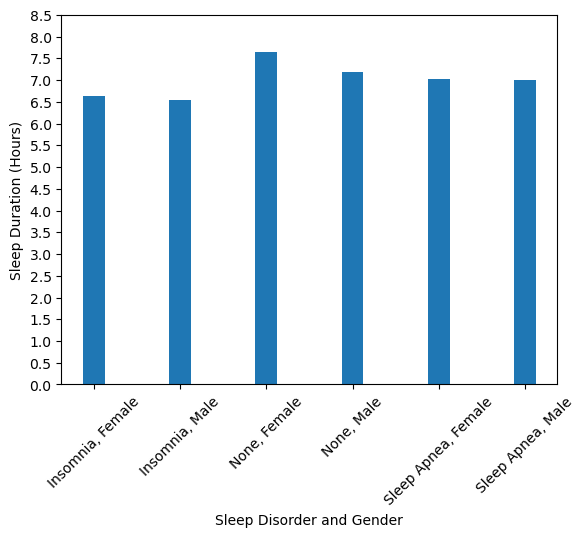

In [29]:
# Graph Duration Data - Female
duration_grouped_gender = needed_data_df.groupby(['Sleep Disorder', 'Gender'])['Sleep Duration'].mean()
print(duration_grouped_gender)
duration_grouped_gender.plot(y= 'Sleep Duration', kind='bar', width=.25)
plt.xlabel("Sleep Disorder and Gender")
plt.ylabel('Sleep Duration (Hours)')
plt.yticks(np.arange(0, 9, .5))
plt.xticks(np.arange(0, 6, 1), rotation=45, labels=['Insomnia, Female', 'Insomnia, Male', 'None, Female', 'None, Male', 'Sleep Apnea, Female', 'Sleep Apnea, Male'])
plt.show()

__How Sleep Disorders Impact Duration of Sleep__

Looking at the first graph displayed above the results are as one would expect. Those who do not have any sleep disorders do have the longest duration of sleep on average compared to those with either sleep apnea or insomnia. However, it is interesting to notice that sleep apnea does not seem to have as much impact on the duration of sleep as insomnia does. When the data is split between males and females however, the data does get a little more interesting. What you might notice is that the duration of sleep between males and females with either sleep apnea or insomnia are relatively close, but what is noticeable is that females without any sleep disorders sleep for almost a half hour longer than males without any disorder. Another distinct fact that one might notice is that males without a sleep disorder get almost the same amount of sleep on average as males and females with sleep apnea

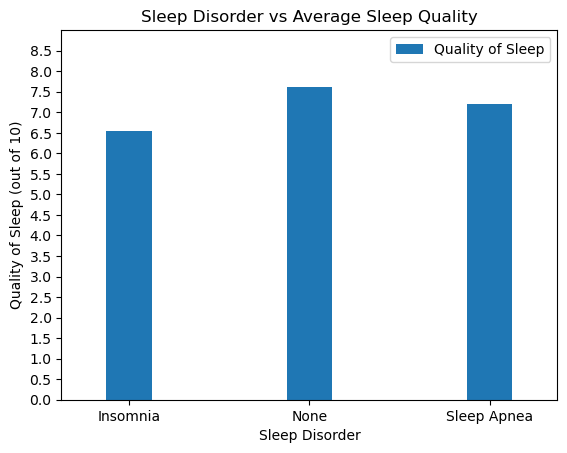

In [30]:
# Graph Quality Data
grouped_data_df.plot(y= 'Quality of Sleep', kind='bar', width=.25, )
plt.title('Sleep Disorder vs Average Sleep Quality')
plt.ylabel('Quality of Sleep (out of 10)')
plt.ylim(0,9)
plt.yticks(np.arange(0, 9, .5))
plt.xticks(rotation=0)
plt.show()

Sleep Disorder  Gender
Insomnia        Female    6.944444
                Male      6.170732
None            Female    8.280488
                Male      7.233577
Sleep Apnea     Female    7.298507
                Male      6.636364
Name: Quality of Sleep, dtype: float64


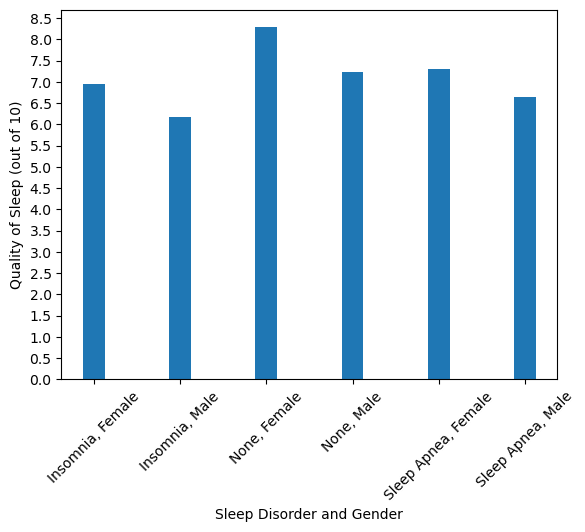

In [32]:
duration_grouped_gender = needed_data_df.groupby(['Sleep Disorder', 'Gender'])['Quality of Sleep'].mean()
print(duration_grouped_gender)
duration_grouped_gender.plot(y= 'Quality of Sleep', kind='bar', width=.25)
plt.xlabel("Sleep Disorder and Gender")
plt.ylabel('Quality of Sleep (out of 10)')
plt.yticks(np.arange(0, 9, .5))
plt.xticks(np.arange(0, 6, 1), rotation=45, labels=['Insomnia, Female', 'Insomnia, Male', 'None, Female', 'None, Male', 'Sleep Apnea, Female', 'Sleep Apnea, Male'])
plt.show()

__How Sleep Disorders Impact Quality of Sleep__

As illustrated in the above graphs, sleep disorders have a seemingly significant impact on the quality of sleep of individuals. When comparing just the two observed sleep disorders however, insomnia takes the top spot of having the largest impact on the average persons quality of sleep being more than a full mark down from the quality of sleep of those without a sleep disorder. However, when separated into male and female groupings the quality of sleep data tells a more interesting story.  Overall, males tend to have significantly lower quality of sleep compared to females with the same (or lack thereof) sleep disorder. The group with the lowest quality of sleep is the males with insomnia who are almost an entire quality point below their female counterparts. 